# Aula 6 (04/11/2022)
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

## Exercícios com transformada de Hough

---

### Transformada de Hough
Computacionalmente caro e nem sempre possue precisão, mas consegue fazer detecção de linhas. Utilização de uma tranformação de espaço para interpretação de parâmetros de linha.

Em cada pixel, é determinados todos os valors de parâmetros que posem ser gerados. Assim, é feito uma votação para cada possibilidade.  

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Rotacionar cartão para posição correta e recortá-lo

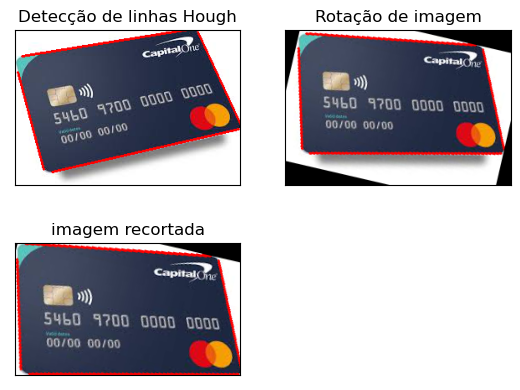

<Figure size 600x600 with 0 Axes>

In [38]:
img_cartao = cv2.imread('images\cartao1.jpg')

gray = cv2.cvtColor(img_cartao,cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,(5))

edges = cv2.Canny(gray,50,150,apertureSize = 3) # Criar a detecção de bordas
lines = cv2.HoughLines(edges,1,np.pi/180,100) # Aplicar Hough lines para a detecção de bordas

# Aplicar Hough lines com Progressive Probabilistic Hough Transform 
# para a detecção de bordas. Linhas com tamanho mínimo de 100 e
# Gap máximo entre pixels de 10 para ser considerado linha. 
plines = cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength=100,maxLineGap=10) 

# Obter theta para rotação da imagem original
for line in lines:
    _,theta = line[0]

# Desenhar as linhas encontradas
for line in plines:
    px1,py1,px2,py2 = line[0]
    cv2.line(img_cartao,(px1,py1),(px2,py2),(0,0,255), 2)

# Calculo do angulo da linha, em graus
angle = np.rad2deg(theta - np.pi/2)

# dados para rotação da imagem
height, width = img_cartao.shape[:2]
center = (width/2, height/2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=1)

# Rotacionar a imagem
rotated_image = cv2.warpAffine(
    src=img_cartao, M=rotate_matrix, dsize=(width, height))

# Recortar a imagem

# Listas para guardar os valores minimos e máximos dos pontos dos extremos de cada linha
px_list = []
py_list = []

edges_rotated = cv2.Canny(rotated_image,50,150,apertureSize = 3)
rlines = cv2.HoughLinesP(edges_rotated,1,np.pi/180,50,minLineLength=125,maxLineGap=8)
for line in rlines:
    px1,py1,px2,py2 = line[0]
    px_list.append(px1)
    px_list.append(px2)
    py_list.append(py1)
    py_list.append(py2)

# Imagem recortada conforma míminos e máximos de cada linha que contém o cartão
cropped_image = rotated_image[min(py_list):max(py_list), min(px_list):max(px_list)]

# Plotar todos os resultados
titles = ['Detecção de linhas Hough', 'Rotação de imagem', 'imagem recortada']
images = [img_cartao, rotated_image, cropped_image]
for i in range(3):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.figure(figsize=(6,6))
plt.show()